In [109]:
import os
import joblib
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pandas.api.types import is_numeric_dtype

from sqlalchemy import create_engine

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [110]:
sns.set_theme(style="whitegrid")

#### Carregamento dos dados

In [111]:
try:
    BASEDIR = os.path.abspath(os.path.dirname(__file__))
except NameError:
    BASEDIR = os.getcwd()

DBPATH = os.path.join(BASEDIR, "db.sqlite3")

In [112]:
# criando engine para conexao com o sqlite
engine = create_engine("sqlite:///" + DBPATH)

In [113]:
with engine.connect() as con:
    df = pd.read_sql_table("customer", con=con)

In [114]:
df.head()

,id,age,usage,plan,customer_satisfaction,time_contract,monthly_value,churn
0,1,56,52,Premium,1,Curto,75.48,0
1,2,69,65,Basico,4,Curto,79.25,0
2,3,46,76,Standard,3,Longo,183.56,0
3,4,32,42,Basico,2,Longo,162.50,0
4,5,60,74,Standard,2,Longo,186.23,1


In [115]:
df.drop("id", axis=1, inplace=True)
df.shape

(1000, 7)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    1000 non-null   int64  
 1   usage                  1000 non-null   object 
 2   plan                   1000 non-null   object 
 3   customer_satisfaction  1000 non-null   int64  
 4   time_contract          1000 non-null   object 
 5   monthly_value          1000 non-null   float64
 6   churn                  1000 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [117]:
df["usage"] = df["usage"].astype(np.int16)

#### Análise Exploratoria

In [118]:
df.isna().sum()

age                      0
usage                    0
plan                     0
customer_satisfaction    0
time_contract            0
monthly_value            0
churn                    0
dtype: int64

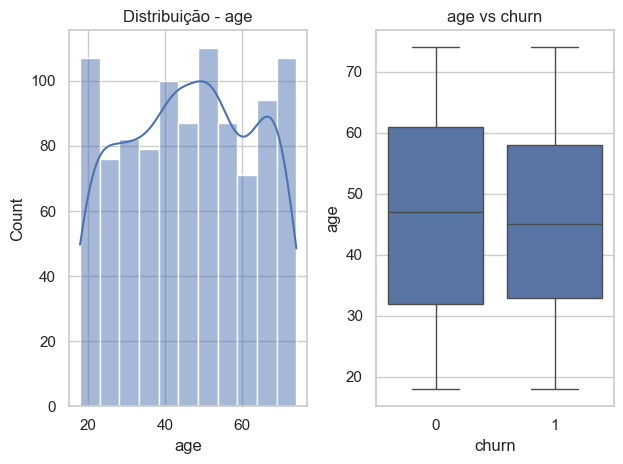

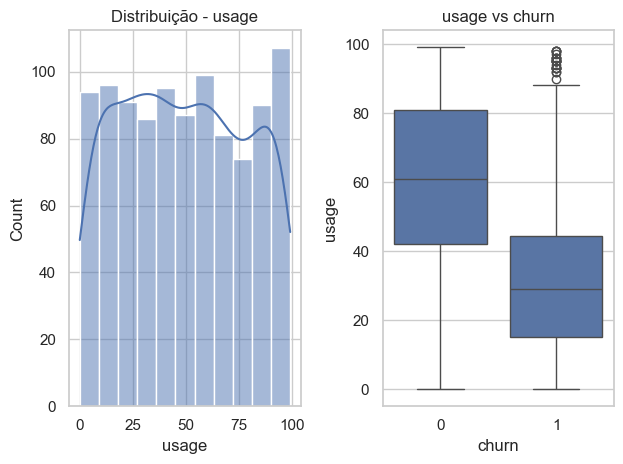

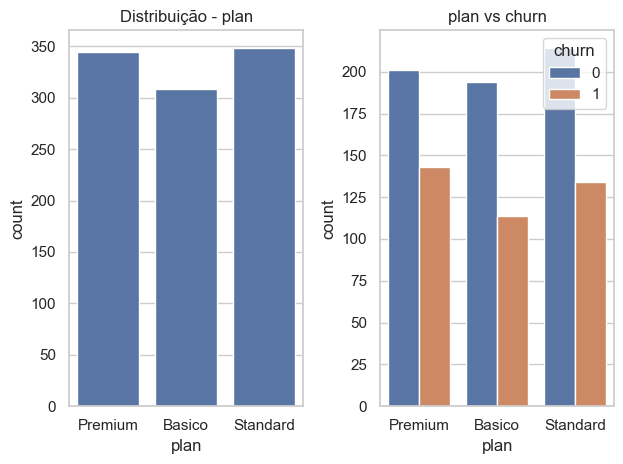

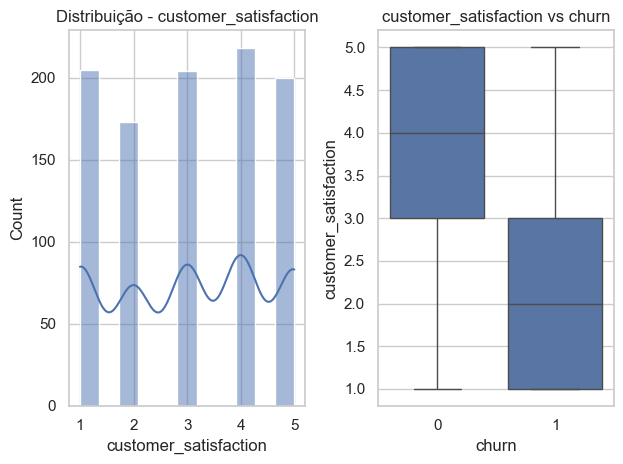

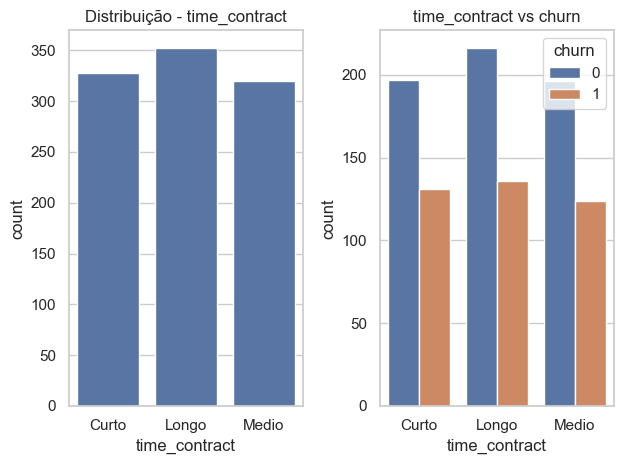

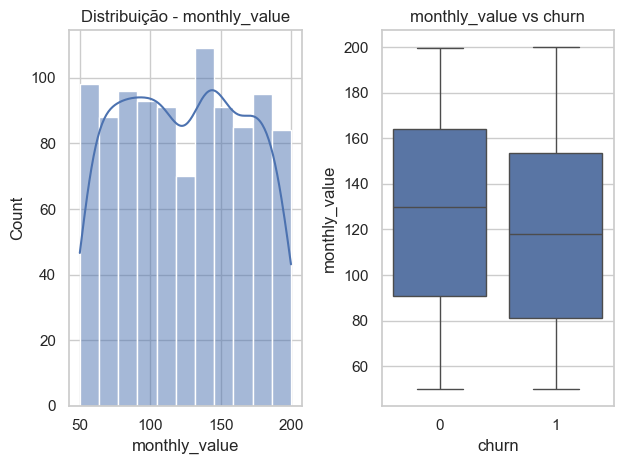

In [119]:
for column in df.columns:
    if column != "churn":
        fig, axes = plt.subplots(1, 2)
        if is_numeric_dtype(df[column].dtype):
            sns.histplot(df[column], kde=True, ax=axes[0])
            sns.boxplot(x="churn", y=column, data=df, ax=axes[1])
        else:
            sns.countplot(x=column, data=df, ax=axes[0])
            sns.countplot(x=column, hue="churn", data=df, ax=axes[1])

        axes[0].set_title(f"Distribuição - {column}")
        axes[1].set_title(f"{column} vs churn")
        plt.tight_layout()
        plt.show()